In [1]:
from Thick_Shell_Class import Dark_Photon_Thick_Shell
from Thick_Shell_Class import s2app_func

In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
ft_to_ev_inverse = 1544855.50049
v_sense = 10**(-8)
Vapp = 30000
R0 = 2 * ft_to_ev_inverse
R1 = 2.5 * ft_to_ev_inverse
thickness_in_cm = 1 #I am guessing the thickness
R2 = (2.5 + thickness_in_cm * 0.0328084) * ft_to_ev_inverse 

In [4]:
def Delta_V(epsilon,m):
    s2app = s2app_func(epsilon,m,R1,R2,Vapp)
    DPTS = Dark_Photon_Thick_Shell(epsilon,m,R1,R2,s2app,fast=True)
    return Vapp - DPTS.Vpp(R0)

In [5]:
number_of_epsilon = 300
number_of_m = 300

In [6]:
epsilon_list = np.logspace(-10,0,number_of_epsilon) #this is the base 10 exponent range

In [7]:
m_list = np.logspace(-18,-4.5,number_of_m)

In [8]:
Delta_V_evaluated = np.zeros(shape=(number_of_epsilon,number_of_m))
for (i,m) in enumerate(m_list):
    for (j,epsilon) in enumerate(epsilon_list):
        Delta_V_evaluated[i][j] = Delta_V(epsilon,m)

In [9]:
#check whether the potential difference is larger than v_sensitivity. If so, already eliminated by experiment
#if still smaller, then it's still possible
Delta_V_possible = Delta_V_evaluated<v_sense

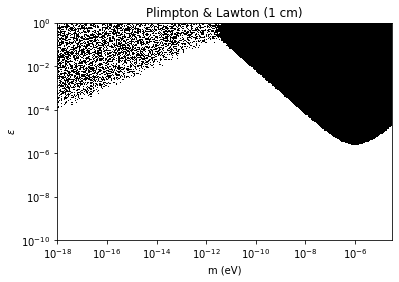

In [10]:
plt.pcolormesh(m_list,epsilon_list,Delta_V_possible.T,cmap="gray") #always plot the transpose with colormesh
plt.xscale("log")
plt.yscale("log")
plt.ylabel('$\epsilon$')
plt.xlabel('m (eV)')
plt.title("Plimpton & Lawton ({} cm)".format(str(thickness_in_cm)))
plt.savefig("Plimpton & Lawton Thick Shell ({} cm) with new proposed paramters.png".format(str(thickness_in_cm)),dpi=300)